<a href="https://colab.research.google.com/github/001hazel/Phys-134/blob/main/Optical_Pumping_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Optical Pumping Lab

### Low Field Zeeman Effect

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize
import scipy as sp
import scipy.stats as stats

Data and associated error

In [8]:
frequency = np.array([0, 0.10427, 0.11426, 0.12446, 0.13406, 0.14409, 0.15471, 0.16469, 0.17450, 0.18410])
voltage_1 = np.array([0.360, 0.612, 0.624, 0.646, 0.672, 0.700, 0.728, 0.744, 0.772, 0.796])
error_1 = np.array([0.008, 0.009, 0.009, 0.009, 0.008, 0.012, 0.012, 0.010, 0.016, 0.012])
voltage_2 = np.array([0.360, 0.730, 0.754, 0.794, 0.832, 0.868, 0.912, 0.948, 0.968, 1.000])
error_2 = np.array([0.008, 0.010, 0.009, 0.012, 0.012, 0.012, 0.024, 0.018, 0.014, 0.016])

Linear model

In [3]:
def linear(x,A,B):
  return A*x + B

Fit curves of resonances

In [9]:
params_1,covariance_1 = scipy.optimize.curve_fit(linear,voltage_1,frequency,sigma=error_1,absolute_sigma=True)
params_2,covariance_2 = scipy.optimize.curve_fit(linear,voltage_2,frequency,sigma=error_2,absolute_sigma=True)

In [ ]:
params_1

array([ 0.42530416, -0.15281536])

Model based on fit parameters

In [10]:

model_1 = linear(voltage_1,*params_1)
model_2 = linear(voltage_2,*params_2)

Plot of the resonances as function of current

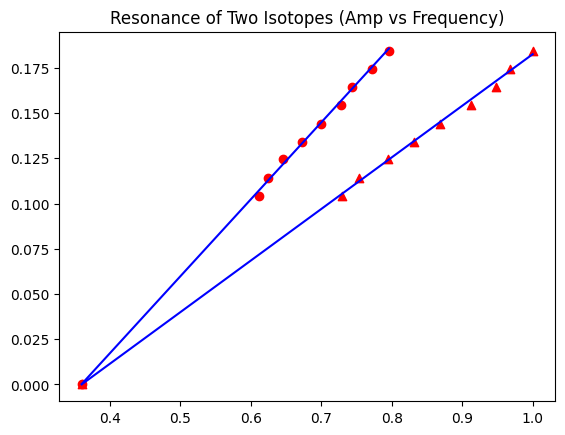

In [11]:
plt.figure()
plt.plot(voltage_1,model_1,color='blue')
plt.plot(voltage_2,model_2,color='blue')
plt.scatter(voltage_1,frequency,marker='o',color='red')
#plt.errorbar(voltage_1,frequency,xerr=error_1,fmt='o',color='red')
plt.scatter(voltage_2,frequency,marker='^',color='red')
#plt.errorbar(voltage_2,frequency,xerr=error_2,fmt='^',color='red')
plt.title('Resonance of Two Isotopes (Amp vs Frequency)')
plt.show()

Ratio of the slopes

In [12]:
print(params_1[0],'/',params_2[0],'=',params_1[0]/params_2[0])

0.4253041586191716 / 0.2851453648642063 = 1.491534532997626


Measure of the residual field, based on the center of the zero field resonance

In [5]:
residual = 8.991*10**-3*0.360*11/0.1639
print(residual)

0.21723221476510066


Calculating g-factors. Values for magnetic fields obtained from geometry of the coils at 134 kHz 

In [6]:
B1 = 8.991*10**-3*0.672*11/0.1639
B2 = 8.991*10**-3*11*0.832/0.1639
B1 = B1-residual
B2 = B2-residual
g_f1 = 0.13406/(B1*1.3996)
g_f2 = 0.13406/(B2*1.3996)
print(B1,B2)
print('g factors are',g_f1,g_f2)

0.18826791946308727 0.28481557046979855
g factors are 0.5087670280370841 0.3363036287024795


In [2]:
def mag_field(f,g):
  return f/(g*1.3996)

Obtaining linear relation between sweep field magnitude and current through sweep coils

In [13]:
sweep_field = mag_field(frequency,g_f1)

params_3,covariance_3 = scipy.optimize.curve_fit(linear,voltage_1,sweep_field,sigma=error_1,absolute_sigma=True)

sweep_line = linear(voltage_1,*params_3)

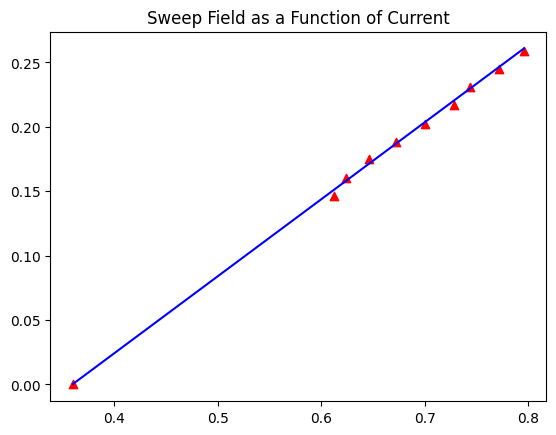

In [14]:
plt.figure()
plt.plot(voltage_1,sweep_line,color='blue')
plt.scatter(voltage_1,sweep_field,marker='^',color='red')
plt.title('Sweep Field as a Function of Current')
plt.show()

In [15]:
params_3

array([ 0.5972783 , -0.21460712])

Calculating contribution of main field, finding linear relation with current

In [16]:
frequency_2 = np.array([200.11,301.86,403.64,502.74,601.50,706.55,804.59,903.88])
sweep_current = np.array([0.664,0.736,0.816,0.776,0.656,0.688,0.856,0.736])
main_current = np.array([0.028,0.048,0.068,0.098,0.128,0.152,0.164,0.198])
expected_field = mag_field(frequency_2,g_f2)/1000
sweep_field = linear(sweep_current,*params_3)
main_field = expected_field - sweep_field
error_3 = np.ones(np.shape(main_current))*0.012


In [17]:
print(expected_field)

[0.42514131 0.64131305 0.85754854 1.06809026 1.27790963 1.50109236
 1.70938207 1.92032745]


In [18]:
params_4, covariance_4 = scipy.optimize.curve_fit(linear,main_current,main_field,sigma=error_3,absolute_sigma=True)

In [19]:
main_line = linear(main_current,*params_4)

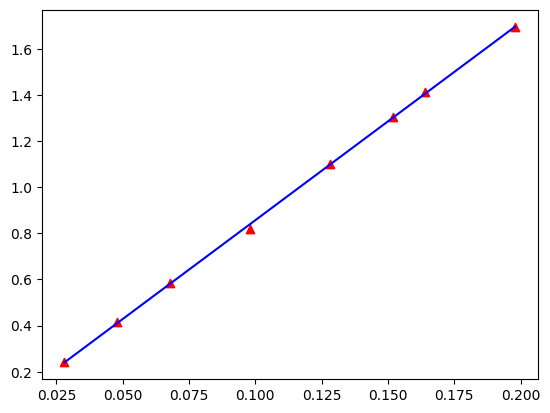

In [20]:
plt.figure()
plt.plot(main_current,main_line,color='blue')
plt.scatter(main_current,main_field,marker='^',color='red')
plt.show()

In [21]:
print(params_4)

[8.57026296e+00 1.10423574e-04]


### Quadratic Zeeman effect

Obtaining total fields for Rb 87 at a frequency of 4.99931 MHz, main field current of 0.8 amps

In [22]:
sweep_current_87 = np.array([0.744,0.768,0.784,0.800])
main_field_87 = params_4[0]*0.8
sweep_field_87 = linear(sweep_current_87,*params_3)
total_field_87 = sweep_field_87 + main_field_87
print(total_field_87)

[7.08597831 7.10031299 7.10986944 7.11942589]


Obtaining total fields for Rb 85 at a frequency of 3.34 MHz, main field current of 0.8 amps

In [23]:
sweep_current_85 = np.array([0.736,0.768,0.784,0.816,0.848,0.864])
sweep_field_85 = linear(sweep_current_85,*params_3)
total_field_85 = sweep_field_85 + main_field_87
print(total_field_85)

[7.08120008 7.10031299 7.10986944 7.12898234 7.14809525 7.1576517 ]
